In [1]:
import binascii
import base64
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

# 1.1 Decode binary file

In [2]:
file = open('input.txt', "r", encoding='utf-8').readlines()[0]
file = int(file, 2)
file = binascii.unhexlify('%x' % file)
file = base64.b64decode(file)
file = file.decode("utf-8")

In [3]:
file = file.split('\n')
file

['Well, and now you see that it’s absolutely pointless to try to invent your own ',
 '"crypto" with expectations that if someone doesn\'t know the algorithm (even binary base64, which is pretty stupid) it’s impossible for him to decipher. You\'re reading this now in plain text so that argument clearly falls short.',
 '',
 'Now to the actual tasks. All of them are graded based on the code you write, so no point in stealing deciphered text from your classmates.',
 'Write a piece of software to attack a single-byte XOR cipher which is the same as Caesar but with xor op.',
 '7958401743454e1756174552475256435e59501a5c524e176f786517545e475f5245191772195019175e4317445f58425b531743565c521756174443455e595017d5b7ab5f525b5b58174058455b53d5b7aa175659531b17505e41525917435f52175c524e175e4417d5b7ab5c524ed5b7aa1b174f584517435f5217515e454443175b524343524517d5b7ab5fd5b7aa17405e435f17d5b7ab5cd5b7aa1b17435f5259174f584517d5b7ab52d5b7aa17405e435f17d5b7ab52d5b7aa1b17435f525917d5b7ab5bd5b7aa17405e435f17d5b7ab

# 1.2 Decrypt single-byte XOR cipher

In [4]:
ciphertext = file[-5]
print(ciphertext)
ciphertext = binascii.unhexlify(ciphertext)
ciphertext

7958401743454e1756174552475256435e59501a5c524e176f786517545e475f5245191772195019175e4317445f58425b531743565c521756174443455e595017d5b7ab5f525b5b58174058455b53d5b7aa175659531b17505e41525917435f52175c524e175e4417d5b7ab5c524ed5b7aa1b174f584517435f5217515e454443175b524343524517d5b7ab5fd5b7aa17405e435f17d5b7ab5cd5b7aa1b17435f5259174f584517d5b7ab52d5b7aa17405e435f17d5b7ab52d5b7aa1b17435f525917d5b7ab5bd5b7aa17405e435f17d5b7ab4ed5b7aa1b1756595317435f5259174f58451759524f4317545f564517d5b7ab5bd5b7aa17405e435f17d5b7ab5cd5b7aa175650565e591b17435f525917d5b7ab58d5b7aa17405e435f17d5b7ab52d5b7aa1756595317445817585919176e5842175a564e17424452175659175e5953524f1758511754585e59545e53525954521b177f565a5a5e595017535e4443565954521b177c56445e445c5e17524f565a5e5956435e58591b17444356435e44435e54565b17435244434417584517405f564352415245175a52435f5853174e5842175152525b174058425b5317445f584017435f52175552444317455244425b4319


b'yX@\x17CEN\x17V\x17ERGRVC^YP\x1a\\RN\x17oxe\x17T^G_RE\x19\x17r\x19P\x19\x17^C\x17D_XB[S\x17CV\\R\x17V\x17DCE^YP\x17\xd5\xb7\xab_R[[X\x17@XE[S\xd5\xb7\xaa\x17VYS\x1b\x17P^ARY\x17C_R\x17\\RN\x17^D\x17\xd5\xb7\xab\\RN\xd5\xb7\xaa\x1b\x17OXE\x17C_R\x17Q^EDC\x17[RCCRE\x17\xd5\xb7\xab_\xd5\xb7\xaa\x17@^C_\x17\xd5\xb7\xab\\\xd5\xb7\xaa\x1b\x17C_RY\x17OXE\x17\xd5\xb7\xabR\xd5\xb7\xaa\x17@^C_\x17\xd5\xb7\xabR\xd5\xb7\xaa\x1b\x17C_RY\x17\xd5\xb7\xab[\xd5\xb7\xaa\x17@^C_\x17\xd5\xb7\xabN\xd5\xb7\xaa\x1b\x17VYS\x17C_RY\x17OXE\x17YROC\x17T_VE\x17\xd5\xb7\xab[\xd5\xb7\xaa\x17@^C_\x17\xd5\xb7\xab\\\xd5\xb7\xaa\x17VPV^Y\x1b\x17C_RY\x17\xd5\xb7\xabX\xd5\xb7\xaa\x17@^C_\x17\xd5\xb7\xabR\xd5\xb7\xaa\x17VYS\x17DX\x17XY\x19\x17nXB\x17ZVN\x17BDR\x17VY\x17^YSRO\x17XQ\x17TX^YT^SRYTR\x1b\x17\x7fVZZ^YP\x17S^DCVYTR\x1b\x17|VD^D\\^\x17ROVZ^YVC^XY\x1b\x17DCVC^DC^TV[\x17CRDCD\x17XE\x17@_VCRARE\x17ZRC_XS\x17NXB\x17QRR[\x17@XB[S\x17D_X@\x17C_R\x17URDC\x17ERDB[C\x19'

In [5]:
#find key by bruteforceing 258 possible outcomes
def brute_force_caesar(ciphertext):
    for i in range(258):
        
        message = "".join([chr(ch ^ i) for ch in ciphertext])
        print("[%d]%s\n"%(i, message))
        

brute_force_caesar(ciphertext)

In [35]:
#key := 23 looks good
message = "".join([chr(ch ^ 23) for ch in ciphertext])

In [36]:
print(message.replace('\x00', ' ').replace('\x0e', '\n').replace('½', '"').replace('¼', '"').replace('Â', '').replace(' "', '"'))

KEY xor CIPHERATING
 e
G
 IT SHOULD TAKE A STRING  "HELLO WORLD " AND GIVEN THE KEY IS  "KEY " XOR THE FIRST LETTER  "H " WITH  "K " THEN XOR  "E " WITH  "E " THEN  "L " WITH  "Y " AND THEN XOR NEXT CHAR  "L " WITH  "K " AGAIN THEN  "O " WITH  "E " AND SO ON
 yOU MAY USE AN INDEX OF COINCIDENCE hAMMING DISTANCE kASISKI EXAMINATION STATISTICAL TESTS OR WHATEVER METHOD YOU FEEL WOULD SHOW THE BEST RESULT



# 1.3 Decrypt repeating key cipher

In [37]:
ciphertext = file[-4]
print(ciphertext)
ciphertext = base64.b64decode(ciphertext)
ciphertext

G0IFOFVMLRAPI1QJbEQDbFEYOFEPJxAfI10JbEMFIUAAKRAfOVIfOFkYOUQFI15ML1kcJFUeYhA4IxAeKVQZL1VMOFgJbFMDIUAAKUgFOElMI1ZMOFgFPxADIlVMO1VMO1kAIBAZP1VMI14ANRAZPEAJPlMNP1VMIFUYOFUePxxMP19MOFgJbFsJNUMcLVMJbFkfbF8CIElMfgZNbGQDbFcJOBAYJFkfbF8CKRAeJVcEOBANOUQDIVEYJVMNIFwVbEkDORAbJVwAbEAeI1INLlwVbF4JKVRMOF9MOUMJbEMDIVVMP18eOBADKhALKV4JOFkPbFEAK18eJUQEIRBEO1gFL1hMO18eJ1UIbEQEKRAOKUMYbFwNP0RMNVUNPhlAbEMFIUUALUQJKBANIl4JLVwFIldMI0JMK0INKFkJIkRMKFUfL1UCOB5MH1UeJV8ZP1wVYBAbPlkYKRAFOBAeJVcEOBACI0dAbEkDORAbJVwAbF4JKVRMJURMOF9MKFUPJUAEKUJMOFgJbF4JNERMI14JbFEfbEcJIFxCbHIJLUJMJV5MIVkCKBxMOFgJPlVLPxACIxAfPFEPKUNCbDoEOEQcPwpDY1QDL0NCK18DK1wJYlMDIR8II1MZIVUCOB8IYwEkFQcoIB1ZJUQ1CAMvE1cHOVUuOkYuCkA4eHMJL3c8JWJffHIfDWIAGEA9Y1UIJURTOUMccUMELUIFIlc=


b'\x1bB\x058UL-\x10\x0f#T\tlD\x03lQ\x188Q\x0f\'\x10\x1f#]\tlC\x05!@\x00)\x10\x1f9R\x1f8Y\x189D\x05#^L/Y\x1c$U\x1eb\x108#\x10\x1e)T\x19/UL8X\tlS\x03!@\x00)H\x058IL#VL8X\x05?\x10\x03"UL;UL;Y\x00 \x10\x19?UL#^\x005\x10\x19<@\t>S\r?UL U\x188U\x1e?\x1cL?_L8X\tl[\t5C\x1c-S\tlY\x1fl_\x02 IL~\x06Mld\x03lW\t8\x10\x18$Y\x1fl_\x02)\x10\x1e%W\x048\x10\r9D\x03!Q\x18%S\r \\\x15lI\x039\x10\x1b%\\\x00l@\x1e#R\r.\\\x15l^\t)TL8_L9C\tlC\x03!UL?_\x1e8\x10\x03*\x10\x0b)^\t8Y\x0flQ\x00+_\x1e%D\x04!\x10D;X\x05/XL;_\x1e\'U\x08lD\x04)\x10\x0e)C\x18l\\\r?DL5U\r>\x19@lC\x05!E\x00-D\t(\x10\r"^\t-\\\x05"WL#BL+B\r(Y\t"DL(U\x1f/U\x028\x1eL\x1fU\x1e%_\x19?\\\x15`\x10\x1b>Y\x18)\x10\x058\x10\x1e%W\x048\x10\x02#G@lI\x039\x10\x1b%\\\x00l^\t)TL%DL8_L(U\x0f%@\x04)BL8X\tl^\t4DL#^\tlQ\x1flG\t \\Blr\t-BL%^L!Y\x02(\x1cL8X\t>UK?\x10\x02#\x10\x1f<Q\x0f)CBl:\x048D\x1c?\nCcT\x03/CB+_\x03+\\\tbS\x03!\x1f\x08#S\x19!U\x028\x1f\x08c\x01$\x15\x07( \x1dY%D5\x08\x03/\x13W\x079U.:F.\n@8xs\t/w<%b_|r\x1f\rb\x00\x18@=cU\x08%DS9C\x1cqC\x04-B

In [38]:
#count num of c coincidence for substring shifts
def index_of_coincidence(ciphertext):
    coincidences = {}
    for i in range(1, len(ciphertext)):
        shifted_ciphertext = ciphertext[-i:] + ciphertext[:-i]
        coincidences[i] = sum(list(
                          map(lambda x: x[0] == x[1], zip(ciphertext, shifted_ciphertext))
                          ))
    
    return coincidences
        
        
ioc = index_of_coincidence(ciphertext)

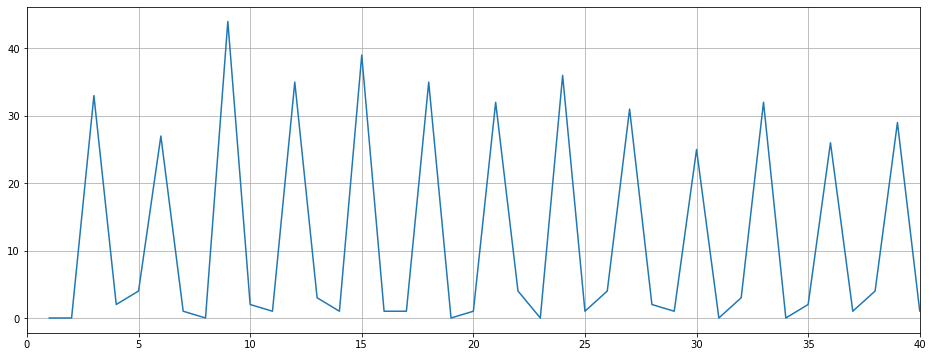

In [43]:
#plot index_of_coincidence
plt.figure(figsize=(16, 6))
plt.plot(ioc.keys(), ioc.values())
plt.grid(True)
_ = plt.xlim([0, 40])

In [44]:
#looks like
key_length = 3

In [45]:
ciphertext = np.array(list(ciphertext))
chr_vect = np.vectorize(chr)

In [46]:
#count num of nonalphabetic chars for each key
counts = {}
for k in range(key_length):
    
    non_alphabetic = {}
    for i in range(1, 256):
        message = ciphertext[k::3] ^ i
        non_alphabetic[i] = ((message < 31) | (message >= 123)).sum()
    
    counts[k] = sorted(non_alphabetic.items(), key=lambda kv: kv[1])

 ## explore counts =>
 - **pos1**  76 or  77
 - **pos2**  48 or  49
 - **pos3** 108 or 109 or 111

In [25]:
#brute force 12 possible variants
def decode_vigenere(ciphertext, key):
    key_len = int(len(ciphertext) / len(key)) + 1
    key = np.tile(key, key_len)[:len(ciphertext)]
    
    return ciphertext ^ key

In [29]:
#final key is [76, 48, 108]
"".join(chr_vect(decode_vigenere(ciphertext, np.array([76, 48, 108]))))

"Write a code to attack some simple substitution cipher. To reduce the complexity of this one we will use only uppercase letters, so the keyspace is only 26! To get this one right automatically you will probably need to use some sort of genetic algorithm (which worked the best last year), simulated annealing or gradient descent. Seriously, write it right now, you will need it to decipher the next one as well. Bear in mind, there's no spaces. \nhttps://docs.google.com/document/d/1HY7Dl-5itYD3C_gkueBvvBFpT4CecGPiR30BsARlTpQ/edit?usp=sharing"

# 1.4 Decrypt substitution  cipher

In [91]:
import nltk
from collections import Counter
from nltk.util import ngrams
from numpy.random import default_rng
import pygad

In [7]:
ciphertext = file[-3]
ciphertext

'EFFPQLEKVTVPCPYFLMVHQLUEWCNVWFYGHYTCETHQEKLPVMSAKSPVPAPVYWMVHQLUSPQLYWLASLFVWPQLMVHQLUPLRPSQLULQESPBLWPCSVRVWFLHLWFLWPUEWFYOTCMQYSLWOYWYETHQEKLPVMSAKSPVPAPVYWHEPPLUWSGYULEMQTLPPLUGUYOLWDTVSQETHQEKLPVPVSMTLEUPQEPCYAMEWWYTYWDLUULTCYWPQLSEOLSVOHTLUYAPVWLYGDALSSVWDPQLNLCKCLRQEASPVILSLEUMQBQVMQCYAHUYKEKTCASLFPYFLMVHQLUPQLHULIVYASHEUEDUEHQBVTTPQLVWFLRYGMYVWMVFLWMLSPVTTBYUNESESADDLSPVYWCYAMEWPUCPYFVIVFLPQLOLSSEDLVWHEUPSKCPQLWAOKLUYGMQEUEMPLUSVWENLCEWFEHHTCGULXALWMCEWETCSVSPYLEMQYGPQLOMEWCYAGVWFEBECPYASLQVDQLUYUFLUGULXALWMCSPEPVSPVMSBVPQPQVSPCHLYGMVHQLUPQLWLRPOEDVMETBYUFBVTTPENLPYPQLWLRPTEKLWZYCKVPTCSTESQPBYMEHVPETCMEHVPETZMEHVPETKTMEHVPETCMEHVPETT'

In [8]:
#use genesis text corpous
#nltk.download('genesis')
plaintext = nltk.corpus.genesis.words(fileids='english-web.txt')
for ch in ".,:;'?!":
    plaintext = "".join(plaintext).upper().replace(ch, '')

In [9]:
def get_ngrams(text, n):
    ngrams_ = ngrams(text, n)
    return list(map(lambda x: "".join(x), ngrams_))

In [10]:
plaintext_ngrams = get_ngrams(plaintext, 4)
ciphertext_ngrams = get_ngrams(ciphertext, 4)

#count number of ngrams for genesis text
plaintext_counts = Counter(plaintext_ngrams)

In [ ]:
def translate(ciphertext, key):
    alphabet = (np.arange(26) + ord('A'))
    key = list(map(ord, key))
    key = {key: alphabet for key, alphabet in zip(key, alphabet)}
    
    translated = ""
    for i in ciphertext:
        translated += chr(key[ord(i)])
    return translated

In [350]:
#fitness function to use for eval
def log_likelihood(text_ngrams, target):
    total = len(target.items())
    likelihood = 0
    
    for ngram in text_ngrams:
        likelihood += np.log1p(target[ngram])
    
    return likelihood

def fitness_function(solution, idx=-1):
    key = {chr(a): chr(b) for a, b in zip(alphabet, solution)}

    ciphertext_ngrams = get_ngrams(translate(ciphertext,key), 4)

    score = -log_likelihood(ciphertext_ngrams, plaintext_counts)
    return score

In [351]:
alphabet = (np.arange(26) + ord('A'))
alphabet

array([65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89, 90])

In [9]:
a = np.arange(20)
b = np.arange(20) + 1000

In [18]:
gene_mask = np.random.uniform(size=26)

In [158]:
def alphabet_permutations(alphabets_in, percentage=0.16, n_sub_groups=4):
    
    for i, alphabet_in in enumerate(alphabets_in):
        alphabet_out = np.zeros_like(alphabet_in)
        alphabet = alphabet_in.copy()
        n_permutatations= int(alphabet.shape[0]  * percentage )
        

        pos_to_swap1 = default_rng().choice(np.arange(25), permutatation_per_group, replace=False)
        pos_to_swap2 = default_rng().choice(np.arange(25), permutatation_per_group, replace=False)

        alphabet_out[pos_to_swap1] = alphabet_in[pos_to_swap2]
        alphabet_out[pos_to_swap2] = alphabet_in[pos_to_swap1]
            
        if i == 1:
            alphabet_out += alphabet
        else:
            gene_mask = np.random.uniform(size=26)
            gene_mask = np.argwhere(gene_mask <= 0.5).reshape(-1)
            alphabet_out[geme_mask] = alphabet[gene_mask]
        
    return (alphabet_out / 2).astype(int)

In [171]:
ga_instance = pygad.GA(num_generations=500,
                       num_parents_mating=2, 
                       fitness_func = fitness_function,
                       sol_per_pop = 250,
                       num_genes = 26 * 4,
                       gene_type = int,
                       crossover_type=alphabet_permutations,
                       crossover_probability = 0.1,
                       mutation_probability = 0
)

In [172]:
ga_instance.run()

In [215]:
solution, _, _ = ga_instance.best_solution()

In [358]:
key = list(map(chr, solution))

In [362]:
print(f'key: {"".join(key)}')

key: EKMFLGDQVZNTOWYHXUSPAJBRCI


In [363]:
key = {key: alphabet for key, alphabet in zip(key, alphabet)}

In [365]:
translate(ciphertext, key)

'ADDTHEABILITYTODECIPHERANYKINDOFPOLYALPHABETICSUBSTITUTIONCIPHERSTHEONEUSEDINTHECIPHERTEXTSHEREHASTWENTYSIXINDEPENDENTRANDOMLYCHOSENMONOALPHABETICSUBSTITUTIONPATTERNSFOREACHLETTERFROMENGLISHALPHABETITISCLEARTHATYOUCANNOLONGERRELYONTHESAMESIMPLEROUTINEOFGUESSINGTHEKEYBYEXHAUSTIZESEARCHWHICHYOUPROBABLYUSEDTODECIPHERTHEPREZIOUSPARAGRAPHWILLTHEINDEXOFCOINCIDENCESTILLWORKASASUGGESTIONYOUCANTRYTODIZIDETHEMESSAGEINPARTSBYTHENUMBEROFCHARACTERSINAKEYANDAPPLYFREQUENCYANALYSISTOEACHOFTHEMCANYOUFINDAWAYTOUSEHIGHERORDERFREQUENCYSTATISTICSWITHTHISTYPEOFCIPHERTHENEXTMAGICALWORDWILLTAKETOTHENEXTLABENJOYBITLYSLASHTWOCAPITALYCAPITALJCAPITALBLCAPITALYCAPITALL'